In [158]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [216]:
#Importing personality data and movie ratings csv
df = pd.read_csv('../Documents/MU Fall 2020/Data mining/archive/2018-personality-data.csv', skipinitialspace=True)
dfr = pd.read_csv('../Documents/MU Fall 2020/Data mining/archive/2018_ratings.csv', skipinitialspace=True)
df.head()

,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,movie_1,predicted_rating_1,...,movie_9,predicted_rating_9,movie_10,predicted_rating_10,movie_11,predicted_rating_11,movie_12,predicted_rating_12,is_personalized,enjoy_watching
0,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,high,77658,4.410466,...,120138,4.244817,121372,4.396004,127152,4.120456,95311,4.053847,4,4
1,77c7d756a093150d4377720abeaeef76,7.0,4.0,6.0,5.5,4.0,all,default,94959,4.207280,...,56782,4.019599,5618,3.963953,969,4.174188,1232,4.334877,2,3
2,b7e8a92987a530cc368719a0e60e26a3,4.0,3.0,4.5,2.0,2.5,serendipity,medium,110501,4.868064,...,2288,4.823212,3307,4.676756,1172,4.649281,1212,4.744990,2,2
3,92561f21446e017dd6b68b94b23ad5b7,5.5,5.5,4.0,4.5,4.0,popularity,medium,2905,4.526371,...,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,3,3
4,030001ac2145a938b07e686a35a2d638,5.5,5.5,3.5,4.5,2.5,popularity,medium,2905,4.526371,...,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,2,3


In [217]:
dfr.head()

,useri,movie_id,rating,tstamp
0,8e7cebf9a234c064b75016249f2ac65e,1,5.0,2001-09-10 17:19:56
1,8e7cebf9a234c064b75016249f2ac65e,2,4.0,2001-09-28 11:34:55
2,8e7cebf9a234c064b75016249f2ac65e,3,4.0,2001-09-28 11:42:50
3,8e7cebf9a234c064b75016249f2ac65e,5,5.0,2001-09-28 11:27:30
4,8e7cebf9a234c064b75016249f2ac65e,6,4.0,2002-01-07 18:12:02


In [218]:
#duplicates check
sum(df['userid'].duplicated())

14

In [219]:
#Find the dupes
duplicates = df[df.duplicated(['userid'])]
print(duplicates)

                                userid  openness  agreeableness  \
137   4638502dc978788ec9d44e64e43a6757       6.0            4.5   
138   4638502dc978788ec9d44e64e43a6757       6.0            4.5   
139   4638502dc978788ec9d44e64e43a6757       6.0            4.5   
140   4638502dc978788ec9d44e64e43a6757       6.0            4.5   
141   4638502dc978788ec9d44e64e43a6757       6.0            4.5   
142   4638502dc978788ec9d44e64e43a6757       6.0            4.5   
143   4638502dc978788ec9d44e64e43a6757       6.0            4.5   
144   4638502dc978788ec9d44e64e43a6757       6.0            4.5   
176   c56613815b9f708eb9df7eb6afd42a49       6.0            3.5   
271   9ba0ccf0a69ae15c85d1b289baa4d494       5.0            6.5   
914   75a54727bffcbbb561da9d3eb604f28e       5.5            4.0   
1327  3e0c0afd46ee7366f328ddf1dae83479       5.0            4.0   
1464  5e82ce34f999ec0dbd2859b8b04dfcbf       6.0            1.5   
1719  01e4e18e2e21b84ee1c5813fd5d3797f       6.5            4.

In [253]:
#Delete dupes from df
pd.DataFrame.drop_duplicates(df)

,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,movie_1,predicted_rating_1,...,movie_9,predicted_rating_9,movie_10,predicted_rating_10,movie_11,predicted_rating_11,movie_12,predicted_rating_12,is_personalized,enjoy_watching
0,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,high,77658,4.410466,...,120138,4.244817,121372,4.396004,127152,4.120456,95311,4.053847,4,4
1,77c7d756a093150d4377720abeaeef76,7.0,4.0,6.0,5.5,4.0,all,default,94959,4.207280,...,56782,4.019599,5618,3.963953,969,4.174188,1232,4.334877,2,3
2,b7e8a92987a530cc368719a0e60e26a3,4.0,3.0,4.5,2.0,2.5,serendipity,medium,110501,4.868064,...,2288,4.823212,3307,4.676756,1172,4.649281,1212,4.744990,2,2
3,92561f21446e017dd6b68b94b23ad5b7,5.5,5.5,4.0,4.5,4.0,popularity,medium,2905,4.526371,...,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,3,3
4,030001ac2145a938b07e686a35a2d638,5.5,5.5,3.5,4.5,2.5,popularity,medium,2905,4.526371,...,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,cff910b71f09b3120289ff6b461a9e03,5.5,3.5,2.5,4.0,5.5,popularity,low,108979,4.246346,...,6643,4.409108,115122,3.960470,7700,4.178546,67997,4.085300,3,3
1830,1ab3a4c2921d8da640854819b0f6cfce,4.0,3.5,4.5,4.0,2.5,serendipity,high,93040,4.227140,...,5618,4.149697,903,4.116152,38061,4.155210,1197,4.045751,3,4
1831,a06386edadf3bc614dadb7044708c46c,6.0,3.0,5.5,3.5,6.0,serendipity,low,106173,3.935297,...,26519,3.998642,89707,4.144870,2571,3.860041,108709,3.899857,3,4
1832,bad56d9506832cd79d874a6b66b3d813,5.0,3.5,1.5,3.5,2.5,serendipity,medium,6874,4.241766,...,92259,4.819710,32,4.059369,3730,4.427336,3435,4.844386,4,4


In [254]:
#New dataframe without unnecessary columns
cols = ['userid','openness','agreeableness','stability','conscientiousness','extraversion',
        'assigned_metric','assigned_condition','is_personalized','enjoy_watching']
df2 = pd.DataFrame(columns = cols)
df2['userid'] = df['userid']
df2['openness'] = df['openness']
df2['agreeableness'] = df['agreeableness']
df2['stability'] = df['emotional_stability']
df2['conscientiousness'] = df['conscientiousness']
df2['extraversion'] = df['extraversion']
df2['assigned_metric'] = df['assigned metric']
df2['assigned_condition'] = df['assigned condition']
df2['is_personalized'] = df['is_personalized']
df2['enjoy_watching'] = df['enjoy_watching ']
df2.head()

,userid,openness,agreeableness,stability,conscientiousness,extraversion,assigned_metric,assigned_condition,is_personalized,enjoy_watching
0,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,high,4,4
1,77c7d756a093150d4377720abeaeef76,7.0,4.0,6.0,5.5,4.0,all,default,2,3
2,b7e8a92987a530cc368719a0e60e26a3,4.0,3.0,4.5,2.0,2.5,serendipity,medium,2,2
3,92561f21446e017dd6b68b94b23ad5b7,5.5,5.5,4.0,4.5,4.0,popularity,medium,3,3
4,030001ac2145a938b07e686a35a2d638,5.5,5.5,3.5,4.5,2.5,popularity,medium,2,3


In [255]:
df2.describe()

,openness,agreeableness,stability,conscientiousness,extraversion,is_personalized,enjoy_watching
count,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000
mean,5.376499,4.215921,4.561614,4.662486,3.485551,3.056707,3.517993
std,1.042804,1.137923,1.392548,1.311450,1.468503,1.078507,1.059060
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.500000,3.500000,3.500000,4.000000,2.500000,2.000000,3.000000
50%,5.500000,4.000000,4.500000,4.500000,3.500000,3.000000,4.000000
75%,6.000000,5.000000,5.500000,5.500000,4.500000,4.000000,4.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,5.000000,5.000000


In [235]:
df2.dtypes

userid                 object
openness              float64
agreeableness         float64
stability             float64
conscientiousness     float64
extraversion          float64
assigned_metric        object
assigned_condition     object
is_personalized         int64
enjoy_watching          int64
dtype: object

In [236]:
df2.isna().sum()

userid                0
openness              0
agreeableness         0
stability             0
conscientiousness     0
extraversion          0
assigned_metric       0
assigned_condition    0
is_personalized       0
enjoy_watching        0
dtype: int64

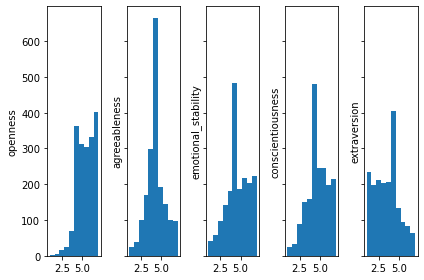

In [251]:
fig,ax = plt.subplots(1,5, tight_layout=True, sharey=True)
for i in range(5):
    ax[i].hist(df.iloc[:,i+1])
    ax[i].set_ylabel(df.columns[i+1])
plt.show()

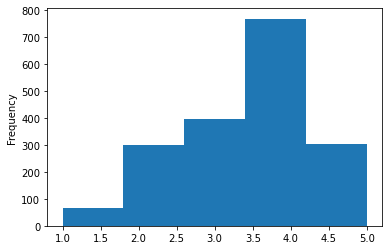

In [263]:
df2['enjoy_watching'].plot.hist(bins=5)

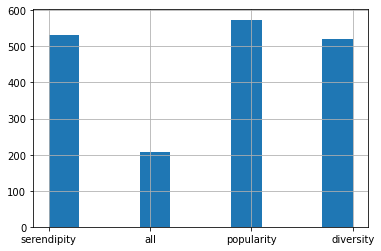

In [267]:
df2['assigned_metric'].hist()

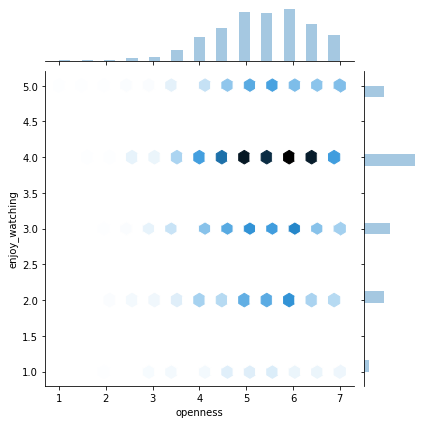

In [203]:
#sns.set_theme("ticks")
sns.jointplot(x='openness', y='enjoy_watching', kind="hex", data=df2)

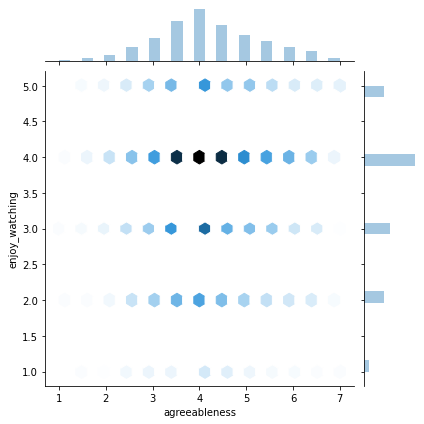

In [252]:
#sns.set_theme("ticks")
sns.jointplot(x='agreeableness', y='enjoy_watching', kind="hex", data=df2)

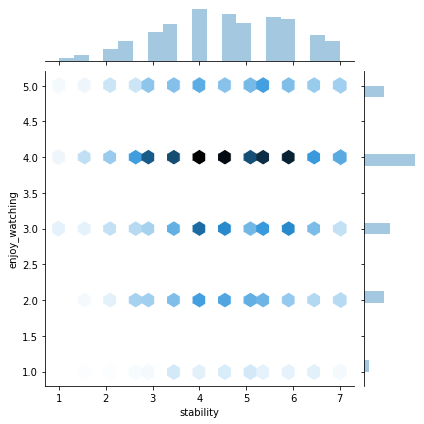

In [256]:
#sns.set_theme("ticks")
sns.jointplot(x='stability', y='enjoy_watching', kind="hex", data=df2)

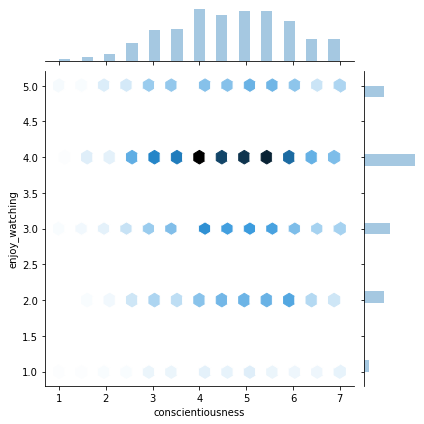

In [275]:
sns.jointplot(x='conscientiousness', y='enjoy_watching', kind="hex", data=df2)

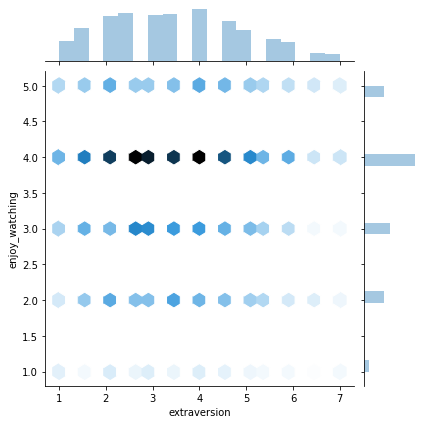

In [258]:
sns.jointplot(x='extraversion', y='enjoy_watching', kind="hex", data=df2)

In [278]:
df2['openness'].corr(df2['enjoy_watching'])

0.06388497588929046

In [279]:
df2['agreeableness'].corr(df2['enjoy_watching'])

0.036837741855602804

In [280]:
df2['stability'].corr(df2['enjoy_watching'])

-0.00223181853207047

In [281]:
df2['conscientiousness'].corr(df2['enjoy_watching'])

-0.043545999421930555

In [282]:
df2['extraversion'].corr(df2['enjoy_watching'])

0.027265482084069474